## Stability in the BY Model

In [1]:
include("src/stability_tests.jl")

compute_mm_coef

In [2]:
using PyPlot
plt = PyPlot

PyPlot

In [3]:
ez = EpsteinZinBY()
by = BYconsumption()

BYconsumption{Float64}(0.0015, 0.979, 0.044, 0.987, 7.9092e-7, 2.3e-6)

In [4]:
J_min, J_max = 2, 120

I_vals = [2, 20]
J_vals = J_min:J_max

r_vals = [compute_spec_rad(ez, discretize(by, i, j)) for i in I_vals, j in J_vals]


2×119 Array{Float64,2}:
 1.05248  1.05369  1.05427  1.05462  …  1.05594  1.05594  1.05594  1.05595
 1.05249  1.0537   1.05428  1.05463     1.05598  1.05598  1.05598  1.05598

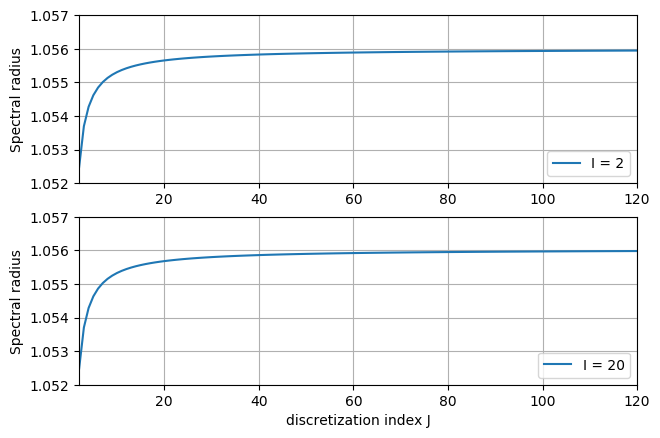

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(7.2, 4.8))

for (ax, i) in zip(axes, (1, 2))
    I = I_vals[i]
    ax[:plot](J_vals, r_vals[i, :], label="I = $I")
    ax[:grid]()
    ax[:set_xlim](J_min, J_max)
    ax[:set_yticks]([1.052, 1.053, 1.054, 1.055, 1.056, 1.057])
    if i == 2
        ax[:set_xlabel]("discretization index J")
    end
    ax[:set_ylabel]("Spectral radius")
    ax[:legend](loc="lower right")
end

plt.savefig("r_vs_j.pdf")
plt.show()